In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

#Data Loading

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Aisyah-Humaira/Dataset/main/Diabetes%20Simple%20Diagnosis.csv')
dataset

,Unnamed: 0,Age,Gender,BMI,High_BP,FBS,HbA1c_level,Smoking,Diagnosis
0,0,80,Female,25,0,140,6.6,0,0
1,1,54,Female,27,0,80,6.6,0,0
2,2,28,Male,27,0,158,5.7,0,0
3,3,36,Female,23,0,155,5.0,1,0
4,4,76,Male,20,1,155,4.8,1,0
...,...,...,...,...,...,...,...,...,...
88375,88375,17,Female,15,0,100,5.7,1,1
88376,88376,22,Male,19,0,120,6.4,1,1
88377,88377,27,Female,24,1,140,7.1,1,1
88378,88378,32,Male,29,1,160,7.8,1,1


#Description of Variables

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88380 entries, 0 to 88379
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   88380 non-null  int64  
 1   Age          88380 non-null  int64  
 2   Gender       88380 non-null  object 
 3   BMI          88380 non-null  int64  
 4   High_BP      88380 non-null  int64  
 5   FBS          88380 non-null  int64  
 6   HbA1c_level  88380 non-null  float64
 7   Smoking      88380 non-null  int64  
 8   Diagnosis    88380 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 6.1+ MB


In [ ]:
dataset.describe()

,Unnamed: 0,Age,BMI,High_BP,FBS,HbA1c_level,Smoking,Diagnosis
count,88380.000000,88380.000000,88380.000000,88380.000000,88380.000000,88380.000000,88380.000000,88380.000000
mean,44189.500000,42.124010,27.073999,0.084205,138.662197,5.546687,0.313419,0.095316
std,25513.252733,22.281225,6.923608,0.277696,41.378602,1.085351,0.463886,0.293652
min,0.000000,0.000000,10.000000,0.000000,80.000000,3.500000,0.000000,0.000000
25%,22094.750000,24.000000,23.000000,0.000000,100.000000,4.800000,0.000000,0.000000
50%,44189.500000,43.000000,27.000000,0.000000,140.000000,5.800000,0.000000,0.000000
75%,66284.250000,60.000000,30.000000,0.000000,159.000000,6.200000,1.000000,0.000000
max,88379.000000,80.000000,95.000000,1.000000,300.000000,12.000000,1.000000,1.000000


#Exploratory Data Analysis - Checking for Missing Values

In [ ]:
dataset.isna().sum()

Unnamed: 0     0
Age            0
Gender         0
BMI            0
High_BP        0
FBS            0
HbA1c_level    0
Smoking        0
Diagnosis      0
dtype: int64

#Exploratory Data Analysis - Univariate Analysis

In [ ]:
categorical_features = ['Gender']
numerical_features = ['Age', 'BMI', 'High_BP', 'FBS', 'HbA1c_level', 'Smoking', 'Diagnosis']

Categorical Features

        jumlah sampel  persentase
Gender                           
Female          51346       58.10
Male            37016       41.88
Other              18        0.02


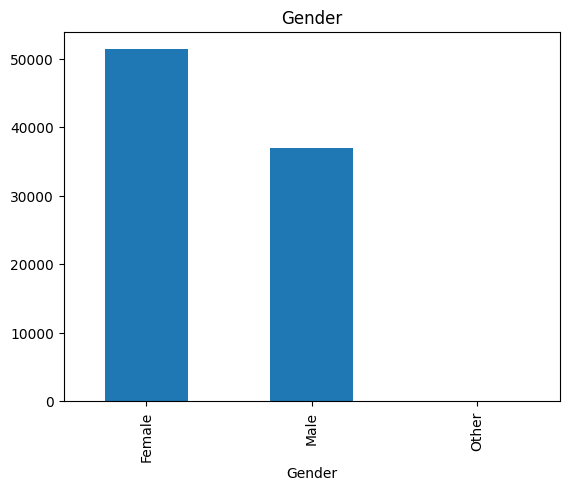

In [ ]:
feature = categorical_features[0]
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(2)})
print(df)
count.plot(kind='bar', title=feature);

Numerical Features

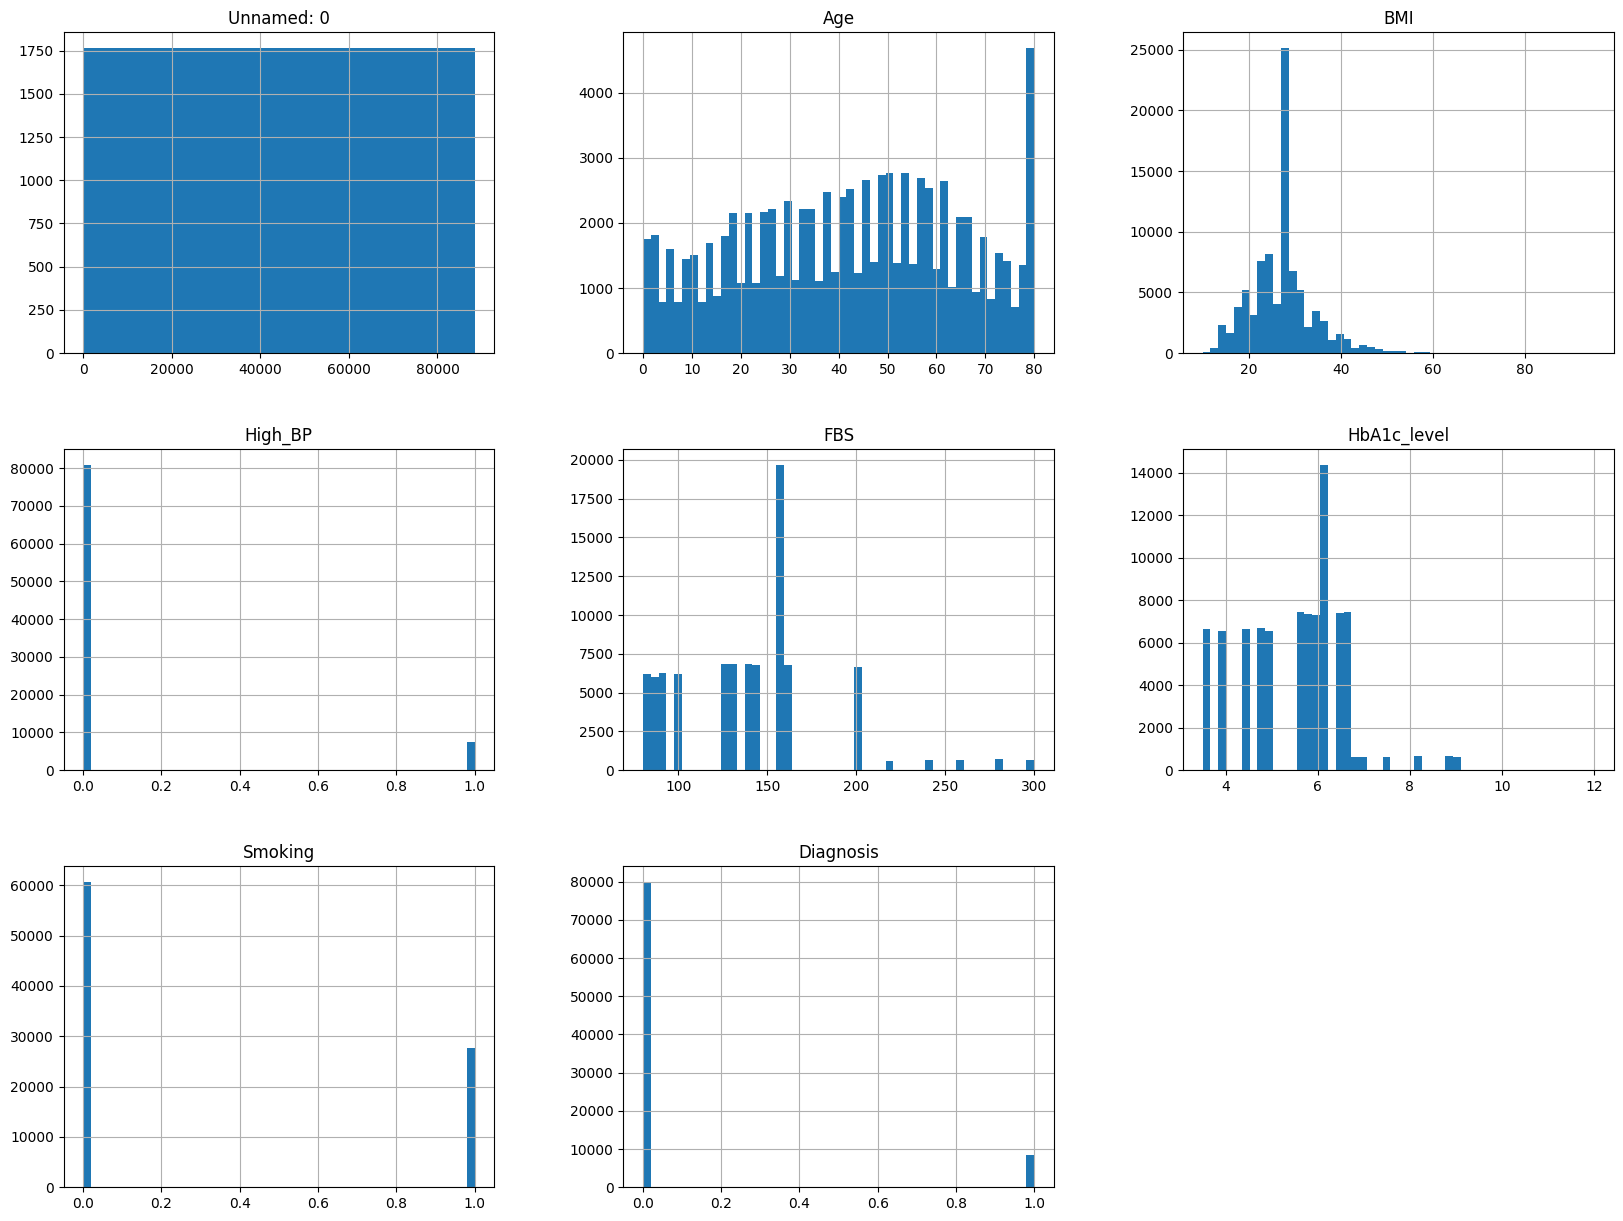

In [ ]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

#Multivariate Analysis

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

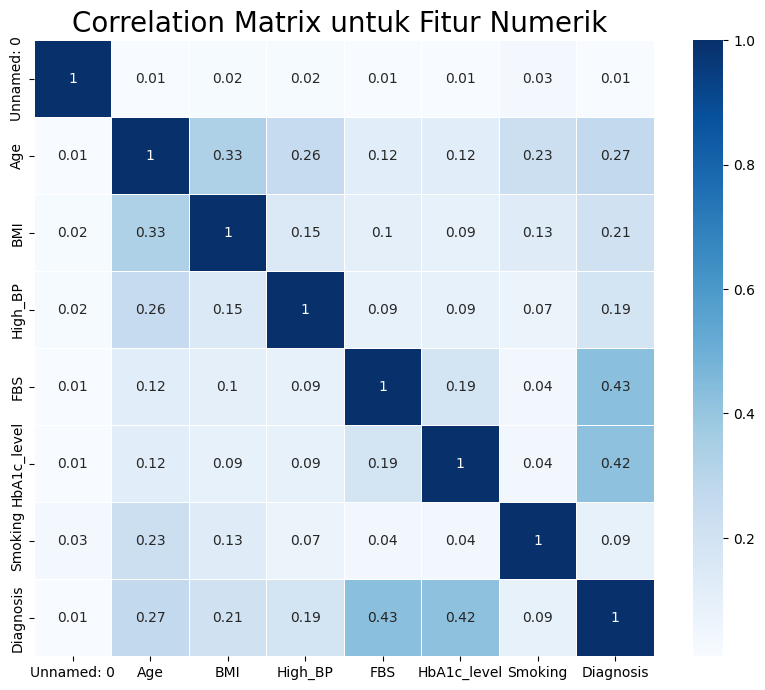

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataset.corr(numeric_only=True).round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap="Blues",  linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Dropping the unnamed column because it has a very small correlation

In [ ]:
dataset.drop(['Unnamed: 0'], inplace=True, axis=1)
dataset.head()

,Age,Gender,BMI,High_BP,FBS,HbA1c_level,Smoking,Diagnosis
0,80,Female,25,0,140,6.6,0,0
1,54,Female,27,0,80,6.6,0,0
2,28,Male,27,0,158,5.7,0,0
3,36,Female,23,0,155,5.0,1,0
4,76,Male,20,1,155,4.8,1,0


#Data Preparation

Encoding Category Features

In [ ]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['Gender'], prefix='Gender')],axis=1)
dataset.drop(['Gender'], axis=1, inplace=True)
dataset.head()

,Unnamed: 0,Age,BMI,High_BP,FBS,HbA1c_level,Smoking,Diagnosis,Gender_Female,Gender_Male,Gender_Other
0,0,80,25,0,140,6.6,0,0,True,False,False
1,1,54,27,0,80,6.6,0,0,True,False,False
2,2,28,27,0,158,5.7,0,0,False,True,False
3,3,36,23,0,155,5.0,1,0,True,False,False
4,4,76,20,1,155,4.8,1,0,False,True,False


##Train-Test-Split

In [ ]:
X = dataset.drop(["Diagnosis"],axis =1)
y = dataset["Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 88380
Total # of sample in train dataset: 70704
Total # of sample in test dataset: 17676


##Standarisation

In [ ]:
numerical_features = ['Age', 'BMI', 'High_BP', 'FBS', 'HbA1c_level', 'Smoking']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Age,BMI,High_BP,FBS,HbA1c_level,Smoking
18362,1.700510,0.280882,3.294713,0.491845,0.602952,-0.674932
7629,-0.722260,2.018572,-0.303517,0.032739,0.142361,-0.674932
24394,0.668589,2.887417,-0.303517,0.395191,0.418716,-0.674932
14573,0.354526,0.715304,-0.303517,1.482546,-0.686703,1.481630
6118,0.623723,-0.008733,-0.303517,-0.208895,3.182264,-0.674932


In [ ]:
X_train[numerical_features].describe().round(4)

,Age,BMI,High_BP,FBS,HbA1c_level,Smoking
count,70704.0000,70704.0000,70704.0000,70704.0000,70704.0000,70704.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.8888,-2.4705,-0.3035,-1.4171,-1.8842,-0.6749
25%,-0.8120,-0.5880,-0.3035,-0.9338,-0.6867,-0.6749
50%,0.0405,-0.0087,-0.3035,0.0327,0.2345,-0.6749
75%,0.8032,0.4257,-0.3035,0.4918,0.6030,1.4816
max,1.7005,9.2589,3.2947,3.8989,5.9458,1.4816


#Model Development

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

##Model Development with K-Nearest Neighbour

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

##Model Development with Random Forest

In [ ]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

##Model Development with Boosting Algorithm

In [ ]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

#Evaluation Model

In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))#/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))#/1e3

mse

,train,test
KNN,0.027474,0.031791
RF,0.015403,0.026833
Boosting,0.031805,0.030721


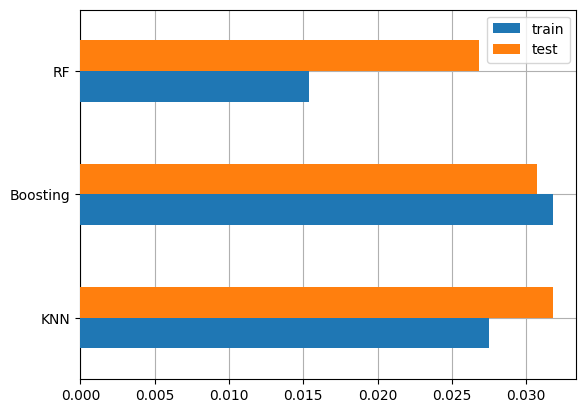

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(2)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
71760,0,0.1,0.05,0.18
